## Plot results of mutation detection experiments

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as cfg
%matplotlib inline

In [42]:
genes = ['TP53', 'PTEN', 'PIK3CA', 'KRAS', 'TTN']
results_dir = os.path.join(cfg.repo_root, 'results', 'mutation')
df = None
raw_df = None
for gene_name in genes:
    results_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_classify_metrics.tsv.gz'.format(gene_name))
    results_df = pd.read_csv(results_file, sep='\t')
    if df is None:
        df = results_df
    else:
        df = pd.concat((df, results_df))
    raw_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_raw_classify_metrics.tsv.gz'.format(gene_name))
    raw_file_df = pd.read_csv(raw_file, sep='\t')
    if raw_df is None:
        raw_df = raw_file_df
    else:
        raw_df = pd.concat((raw_df, raw_file_df))
df = df[df['data_type'] == 'cv']
df.head(n=10)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jake/research/netreg/results/mutation/PTEN/PTEN_raw_classify_metrics.tsv.gz'

In [40]:
raw_df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
0,0.78121,0.76168,TP53,signal,20,121958,pca,train
1,0.79297,0.76040,TP53,signal,20,121958,pca,test
2,0.77970,0.75983,TP53,signal,20,121958,pca,cv
3,0.76613,0.72257,TP53,signal,20,121958,nmf,train
4,0.79004,0.73535,TP53,signal,20,121958,nmf,test
5,0.76495,0.72636,TP53,signal,20,121958,nmf,cv
6,0.78279,0.76341,TP53,signal,20,259178,pca,train
7,0.79350,0.75965,TP53,signal,20,259178,pca,test
8,0.78133,0.76139,TP53,signal,20,259178,pca,cv
9,0.77178,0.73227,TP53,signal,20,259178,nmf,train


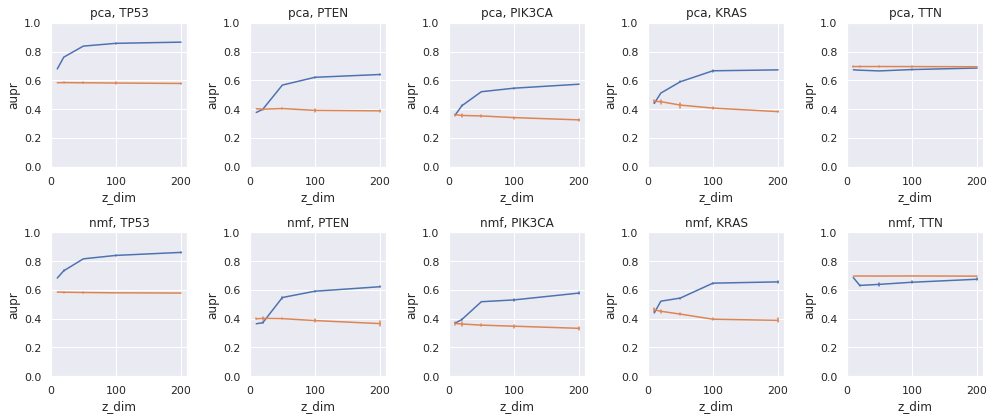

In [38]:
import warnings

sns.set()
fig, axarr = plt.subplots(2, 5)
fig.set_figwidth(14)
fig.set_figheight(6)

with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for a_ix, alg in enumerate(['pca', 'nmf']):
        for g_ix, gene_name in enumerate(genes):
            ax = axarr[a_ix, g_ix]
            gene_df = df[(df['gene_or_cancertype'] == gene_name) & 
                         (df['algorithm'] == alg)]
            sns.lineplot(data=gene_df, x='z_dim', y='aupr', hue='signal', 
                         err_style='bars', ax=ax)
            ax.set_ylim((0.0, 1.0))
            ax.get_legend().remove()
            ax.set_title('{}, {}'.format(alg, gene_name))
plt.tight_layout()